<a href="https://colab.research.google.com/github/srijan-singh/machine-learning/blob/main/Regression/Simple%20Regression/Models/Simple_Regression_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-01-10 08:31:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2021-01-10 08:31:58 (1.37 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
df = pd.read_csv("FuelConsumption.csv")

In [8]:
# To print the first five row of dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# To print the stats of the data(number of entries,mean, standrad deviation, min, 25% of data, 50% of data, 75% of data, max)
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
# selecting features and exploring the data
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
# displaying first 5 rows
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


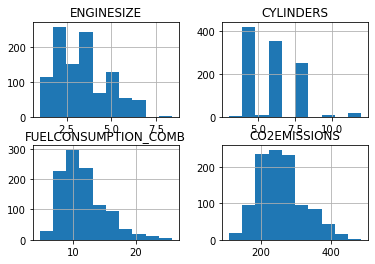

In [12]:
# Plotting histogram
cdf.hist()
# Printing the figures
plt.show()

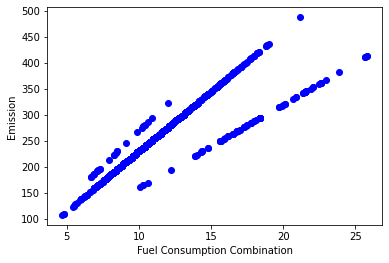

In [13]:
# Plotting the scatter graph
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
# Labeling x-axis
plt.xlabel("Fuel Consumption Combination")
# Labeling y-axis
plt.ylabel("Emission")
plt.show()

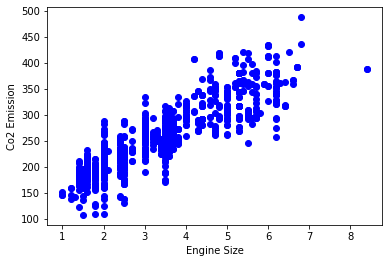

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

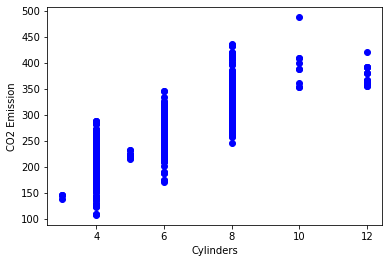

In [17]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

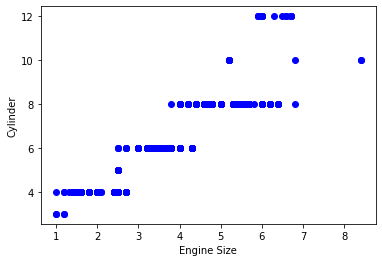

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CYLINDERS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Cylinder")
plt.show()

In [10]:
# Distributing the Data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk] 

#Creating Simple Regression Model

Where feature is Engine Size and label is Co2 Emission
On a linear equation, we can state that:<br>
*y = mx + c* <br>
*Co2 Emission = (Intercept * Engine Size) + Biased Coefficeint*

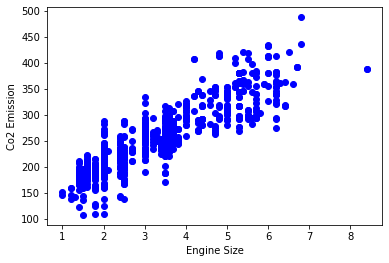

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

### Modeling

In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print("Intercept: ", regr.intercept_," (m)")
print('Biased Coefficient: ',regr.coef_," (c)")

Intercept:  [125.23085025]  (m)
Biased Coefficient:  [[39.36049308]]  (c)


As mentioned, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters

Text(0, 0.5, 'Emission')

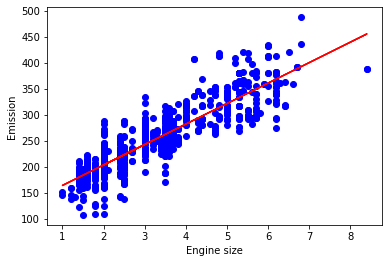

In [18]:
# Plotting the Graph
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

###Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 26.52
Residual sum of squares (MSE): 1159.83
R2-score: 0.64


#User Interface



In [39]:
users_engn_siz = np.asanyarray([[float(input("Engine Size: "))]])
prediction = regr.predict(users_engn_siz)
print("Co2 Emission:",prediction[0][0])

Engine Size: 4.5
Co2 Emission: 302.35306913272916
